# Анализ нормализации признаков, извлечённых с помощью BrepExtractor

В этом ноутбуке мы исследуем, насколько хорошо нормализованы признаки, получаемые из 3D-моделей с помощью BrepExtractor. Будут рассмотрены распределения, статистики и возможные выбросы для каждого блока признаков.

## 1. Импорт необходимых библиотек

Импортируем основные библиотеки для анализа и визуализации, а также классы BrepExtractor и DataModel.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import notebook_setup
from src.dataset import DatasetIO
from src.config import INTERIM_DATA_DIR
from src.features.brep import BrepExtractor
from src.dataset import DataModel


# Настройки визуализации
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

pkl_file = INTERIM_DATA_DIR / "dataset_metadata.pkl"
dataset = DatasetIO.load_dataset_pickle(pkl_file)

print(f"Загружено объектов: {len(dataset)}")

2025-08-14 16:34:54.646 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: D:\workspace\projects\freelance\3d_recognition_analisis


Project root added to path: d:\workspace\projects\freelance\3d_recognition_analisis
2025-08-14 16:34:58.249 | INFO     | src.dataset:load_dataset_pickle:332 - Загрузка датасета из D:\workspace\projects\freelance\3d_recognition_analisis\data\interim\dataset_metadata.pkl
2025-08-14 16:34:58.252 | SUCCESS  | src.dataset:load_dataset_pickle:337 - Датасет загружен из D:\workspace\projects\freelance\3d_recognition_analisis\data\interim\dataset_metadata.pkl
Загружено объектов: 129


## 2. Загрузка и извлечение признаков из моделей

Загрузим список моделей, применим BrepExtractor для получения матриц признаков, соберём их в DataFrame для дальнейшего анализа.

In [2]:

extractor = BrepExtractor(output_mode='matrix')

feature_vectors = []
labels = []
model_ids = []

for item in dataset:
    fv = extractor.extract_single(item)
    if fv is not None:
        feature_vectors.append(fv.vector)
        labels.append(fv.label)
        model_ids.append(fv.model_id)
    else:
        # Если не удалось извлечь признаки, пропускаем объект
        print(f"Пропуск: {item.model_id}")

X = np.stack(feature_vectors)
y = np.array(labels)



2025-08-14 16:34:59.547 | INFO     | src.features.extractor:__init__:54 - Инициализация BRep экстрактора признаков на устройстве cpu
2025-08-14 16:34:59.547 | INFO     | src.features.brep:__init__:61 - Инициализация 'BRep' (K=256, LBO=16, bins=64, D=256, mode=matrix)
2025-08-14 16:34:59.635 | DEBUG    | src.features.brep:extract_single:108 - Матрица признаков 42. Ejector-01: (7, 256)
2025-08-14 16:34:59.754 | DEBUG    | src.features.brep:extract_single:108 - Матрица признаков 42. Ejector-02: (7, 256)
2025-08-14 16:34:59.868 | DEBUG    | src.features.brep:extract_single:108 - Матрица признаков 42. Ejector-03: (7, 256)
2025-08-14 16:34:59.964 | DEBUG    | src.features.brep:extract_single:108 - Матрица признаков 42. Ejector-04: (7, 256)
2025-08-14 16:35:00.030 | DEBUG    | src.features.brep:extract_single:108 - Матрица признаков 42. Ejector-05: (7, 256)
2025-08-14 16:35:00.111 | DEBUG    | src.features.brep:extract_single:108 - Матрица признаков 42. Ejector-06: (7, 256)
2025-08-14 16:35:0

In [5]:
from loguru import logger
from src.modeling.utils.seed import set_seed
from src.modeling.training.trainer_cnn1d import TrainConfigCNN, train_cnn1d
from src.modeling.models.cnn1d import build_cnn1d_base

set_seed(42)
cfg = TrainConfigCNN(val_per_class=3, early_stop_patience=10, emb_dim=256)
model, le, history, metrics = train_cnn1d(
    X, y, cfg,
    model_builder=lambda C: build_cnn1d_base(num_classes=C, emb_dim=cfg.emb_dim),
    logger=None
)

print(f"Модель обучена. Количество классов: {len(le.classes_)}")
print(metrics)




epochs:   0%|          | 0/100 [00:00<?, ?it/s]

train 1/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 2/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 3/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 4/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 5/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 6/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 7/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 8/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 9/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 10/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 11/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 12/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 13/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 14/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 15/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 16/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 17/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 18/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 19/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 20/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 21/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 22/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 23/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 24/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 25/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 26/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 27/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 28/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 29/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 30/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 31/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 32/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 33/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 34/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 35/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 36/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 37/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 38/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 39/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 40/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 41/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 42/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 43/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 44/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 45/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 46/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 47/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 48/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 49/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 50/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 51/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 52/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

train 53/100:   0%|          | 0/2 [00:00<?, ?it/s]

valid:   0%|          | 0/1 [00:00<?, ?it/s]

Модель обучена. Количество классов: 12
{'accuracy': 0.9722222222222222, 'f1_macro': 0.9714285714285715, 'f1_micro': 0.9722222222222222, 'balanced_acc': 0.9722222222222222, 'map_macro': 0.9888888888888889}


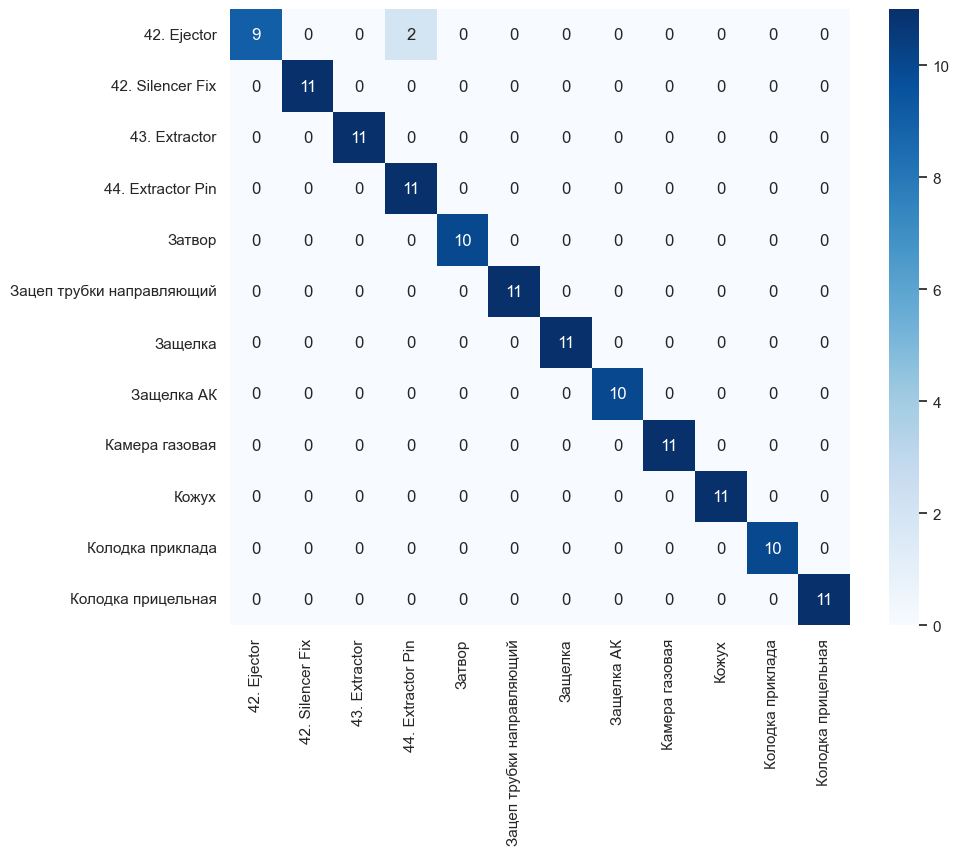

In [14]:
import torch
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Загрузка чекпойнта и LabelEncoder
ckpt = torch.load("best_cnn1d.pt", map_location="cpu")
with open("best_cnn1d_norm.pkl", "rb") as f:
    norm_stats = pickle.load(f)
with open("best_cnn1d_label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

# 2. Восстановите модель
from src.modeling.models.cnn1d import build_cnn1d_base
num_classes = len(le.classes_)
model = build_cnn1d_base(num_classes=num_classes, emb_dim=ckpt["config"]["emb_dim"])
model.load_state_dict(ckpt["model"])
model.eval()

# 3. Подготовьте данные (X_val, y_val)
# Примените нормализацию, как в train_cnn1d
from src.modeling.data.normalization import apply_norm_cp
X_val = apply_norm_cp(X, norm_stats["mu"], norm_stats["std"])
y_val = y

# 4. Получите предсказания
with torch.no_grad():
    logits = model(torch.tensor(X_val, dtype=torch.float32))
    y_pred = logits.argmax(dim=1).cpu().numpy()
    y_true = le.transform(y_val)

# 5. Постройте confusion matrix
cm = confusion_matrix(y_true, y_pred)
# disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.show()